In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [2]:
df = pd.read_csv("E_Products.csv")

df = df.drop(["ImageUrl", "OurImage", "StyleNumber", "Fulltext", "FullMaterial", "Description", "_id", "ModifiedDate"], axis = 1)

df["CreateDate"] = df["CreateDate"].str.split(" ", expand = True)[0]

df["Price"] = pd.to_numeric(df["Price"], errors='coerce')
df["AverageRating"] = pd.to_numeric(df["AverageRating"], errors='coerce')
df["ReviewNumber"] = pd.to_numeric(df["ReviewNumber"], errors='coerce')

df["CreateDate"] = pd.to_datetime(df["CreateDate"])
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76517 entries, 0 to 76516
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Bullets        76517 non-null  object        
 1   CreateDate     76517 non-null  datetime64[ns]
 2   Color          76517 non-null  object        
 3   Gender         74599 non-null  object        
 4   Brand          63781 non-null  object        
 5   Url            76517 non-null  object        
 6   Price          75961 non-null  float64       
 7   Name           76516 non-null  object        
 8   Sport          67908 non-null  object        
 9   Clothing       76226 non-null  object        
 10  Material       69932 non-null  object        
 11  Feature        76517 non-null  object        
 12  AverageRating  73562 non-null  float64       
 13  ReviewNumber   75428 non-null  float64       
 14  Store          76517 non-null  object        
dtypes: datetime64[ns](1

,Bullets,CreateDate,Color,Gender,Brand,Url,Price,Name,Sport,Clothing,Material,Feature,AverageRating,ReviewNumber,Store
0,"['Ideal for regular swimming or training', 'Br...",2018-01-14,"['Black', 'Navy', 'Neon Blue', 'Usa Red', 'USA...",men,speedo,https://www.amazon.co.uk/Speedo-Mens-Essential...,26.74,Speedo Men's Essential Endurance+ 7cm Sportsbrief,"['Swim', 'Training & Gym']","['Swimwear', 'Bottoms']",[],['舒適伸展'],0.0,0.0,amazon-US
1,"['Twin needle stitching throughout.', 'Produce...",2018-01-14,"['Black', 'Heather Grey', 'Navy', 'White', 'Bo...",men,fruit_of_the_loom,https://www.amazon.co.uk/Fruit-Loom-Mens-Belco...,31.38,Fruit Of The Loom Mens Set-In Belcoro® Yarn Sw...,[],['Hoodie & Sweatshirt'],"['100% Cotton', 'Cotton Blended', 'Polyester B...",[],NaN,NaN,amazon-US
2,['HEATLOK THERMALLAYER FOR EXTREME COLD WEATHE...,2018-01-14,"['Black', 'Grey', 'Yellow']",men,ozero,https://www.amazon.co.uk/Winter-Gloves-OZERO-4...,25.72,"Winter Gloves, OZERO -40°F Cold Proof Thermal ...",['Ski & Snowboard'],['Other Accessories'],['Cotton Blended'],"['涼爽透氣', '中空保溫纖維', '防風機能', '保暖禦寒', '防水', '刷毛布']",NaN,NaN,amazon-US
3,"['PICK UP THE PACE whilst running, biking, pla...",2018-01-14,"['Black Large (UK 10-13 / EU 44-47)', 'Black M...",men,fit_nation,https://www.amazon.co.uk/Compression-17-25mmHg...,13.53,"X-Edge® Compression Socks for Men & Women, 17-...","['Running', 'Training & Gym', 'Football']","['Compression wear', 'Sock']","['all/any Spandex', 'Polyamide(Nylon) Blended'...","['提升運動效能設計', '涼爽透氣']",NaN,NaN,amazon-US
4,"[""★（2 PAIRS INCLUDED！）pinshun® (20 - 30 mmHg)C...",2018-01-14,['Black & Blue L/XL (For Women 6.5-13 /For Men...,men,pinshun,https://www.amazon.co.uk/pairs%EF%BC%89Compres...,13.53,（2 pairs）Compression Socks / Stockings for Men...,"['Running', 'Tennis', 'Basketball', 'Hiking & ...","['Compression wear', 'Sock']",[],"['結構性透氣', '提升運動效能設計', '涼爽透氣']",NaN,NaN,amazon-US


In [3]:
df.dropna(inplace = True)
df = df.loc[df["AverageRating"] != 0.0, :]

In [4]:
df = df.sort_values(by = "Brand")

brand_list = df.groupby(by = "Brand").size().index.get_level_values("Brand").to_list()

product_count = df.groupby("Brand").size()

star_price_mean = df.groupby("Brand").mean()

price_max = df.groupby("Brand").max()

price_min = df.groupby("Brand").min()

review_sum = df.groupby("Brand").sum()
star_price_mean
#  = pd.DataFrame(, columns = ["product_count"])

,Price,AverageRating,ReviewNumber
Brand,,,
+md,18.895000,4.750000,18.500000
1000_mile,14.731667,4.566667,79.166667
100_percent,39.540000,4.600000,24.000000
11_degrees,63.965000,5.000000,8.000000
1worldsarong,18.485000,4.633333,15.333333
...,...,...,...
zoggs,36.662895,4.661404,70.114035
zoma,20.103333,4.400000,302.666667
zone,33.525000,4.800000,13.000000


In [5]:
data = {"Brand" : brand_list, 
        "total_products" : product_count}
df_brand = pd.DataFrame(data)
df_brand["avg_rating"] = star_price_mean["AverageRating"]
df_brand["total_reviews"] = review_sum["ReviewNumber"]
df_brand["avg_reviews"] = star_price_mean["ReviewNumber"]
df_brand["avg_price"] = star_price_mean["Price"]
df_brand["max_price"] = price_max["Price"]
df_brand["min_price"] = price_min["Price"]

print(df_brand.info())
df_brand.head()

<class 'pandas.core.frame.DataFrame'>
Index: 2066 entries, +md to zouyue
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Brand           2066 non-null   object 
 1   total_products  2066 non-null   int64  
 2   avg_rating      2066 non-null   float64
 3   total_reviews   2066 non-null   float64
 4   avg_reviews     2066 non-null   float64
 5   avg_price       2066 non-null   float64
 6   max_price       2066 non-null   float64
 7   min_price       2066 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 145.3+ KB
None


,Brand,total_products,avg_rating,total_reviews,avg_reviews,avg_price,max_price,min_price
Brand,,,,,,,,
+md,+md,2,4.750000,37.0,18.500000,18.895000,21.39,16.40
1000_mile,1000_mile,6,4.566667,475.0,79.166667,14.731667,16.45,12.31
100_percent,100_percent,2,4.600000,48.0,24.000000,39.540000,43.63,35.45
11_degrees,11_degrees,2,5.000000,16.0,8.000000,63.965000,64.12,63.81
1worldsarong,1worldsarong,6,4.633333,92.0,15.333333,18.485000,20.88,15.76


In [6]:
df_brand["total_reviews"] = df_brand["total_reviews"].astype(int)
df_brand["avg_rating"] = df_brand["avg_rating"].round(3)
df_brand["avg_price"] = df_brand["avg_price"].round(3)
df_brand["avg_reviews"] = df_brand["avg_reviews"].round(3)

df_brand["per"] = df_brand["total_products"] / df_brand["total_products"].sum()

In [7]:
df_brand["avg_rating_nor"] = preprocessing.scale(df_brand["avg_rating"])
df_brand["avg_reviews_nor"] = preprocessing.scale(df_brand["avg_reviews"])
df_brand["avg_price_nor"] = preprocessing.scale(df_brand["avg_price"])
df_brand["total_productst_nor"] = preprocessing.scale(df_brand["total_products"])

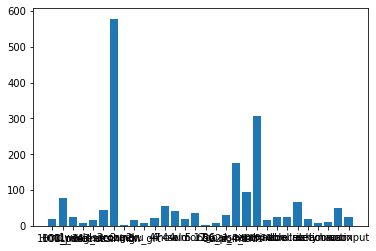

In [8]:
x = df_brand["Brand"].head(30)
y = df_brand["avg_reviews"].head(30)
plt.bar(x, y)
plt.show()

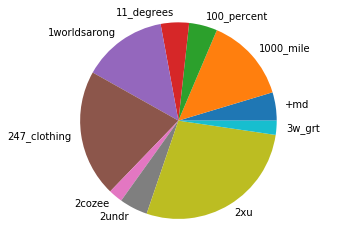

In [9]:
plt.pie(df_brand["total_products"].head(10), labels = df_brand["Brand"].head(10))
plt.axis('equal')
plt.show()

In [10]:
df_brand.to_csv("brand_data.csv", index = False)